# TP : Manipulation de données avec NumPy, Pandas, Matplotlib et Seaborn

## Introduction

Ce TP a pour objectif de vous familiariser avec les bibliothèques Python couramment utilisées en Data Science, notamment NumPy, Pandas, Matplotlib et Seaborn. Nous allons travailler sur le dataset Titanic, qui contient des informations sur les passagers du Titanic, notamment leur âge, sexe, classe, et s'ils ont survécu ou non.
 
## Objectifs pédagogiques :
- Apprendre à importer et explorer un dataset avec Pandas.
- Manipuler les données (gestion des valeurs manquantes, transformations de colonnes).
- Visualiser les données avec Matplotlib et Seaborn.

# Titanic Dataset

Le jeu de données Titanic est un jeu de données populaire souvent utilisé à des fins éducatives et d'introduction à l'analyse de données. Il contient des informations sur les passagers du RMS Titanic, qui a coulé après avoir heurté un iceberg lors de son voyage inaugural en 1912. L'ensemble de données comprend généralement diverses caractéristiques relatives aux passagers, telles que l'âge, le sexe, la classe de billet, le tarif et le statut de survie. 

- PassengerId: Un identifiant unique pour chaque passager.

- Survived: Indique si un passager a survécu (1) ou n'a pas survécu (0).

- Pclass: La classe de billet du passager (1ère, 2ème ou 3ème classe).

- Name: Le nom du passager.

- Sex: Le sexe du passager.

- Age: l'âge du passager.

- Siblings/Spouses Aboard: Nombre de frères et sœurs ou de conjoints à bord du Titanic.

- Parents/Children Aboard:  Nombre de parents ou d'enfants à bord du Titanic.

- Ticket: Le numéro du billet.

- Fare: Le prix payé pour le billet.

- Cabin: Le numéro de la cabine.

- Embarked: Le port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
!pip install numpy pandas matplotlib seaborn

In [11]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
# Load the Titanic dataset
df = pd.read_csv('titanic_dataset.csv')

In [4]:
# Aperçu des premières lignes du dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Statistiques descriptives
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Statistiques descriptives pour les colonnes catégorielles
print("\nStatistiques descriptives pour les colonnes catégorielles :")
df.describe(include=['O'])


Statistiques descriptives pour les colonnes catégorielles :


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## Traitement des données

In [13]:
import pandas as pd
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic_dataset.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In Pandas, usually, missing values are represented by NaN. It stands for Not a Number.

In [14]:
titanic_data.shape

(891, 12)

In [15]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
titanic_data.duplicated().sum()

np.int64(0)

In [18]:
titanic_data.isnull().sum().sum()

np.int64(866)

In [19]:
titanic_data.isnull().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
!pip install missingno

<Axes: >

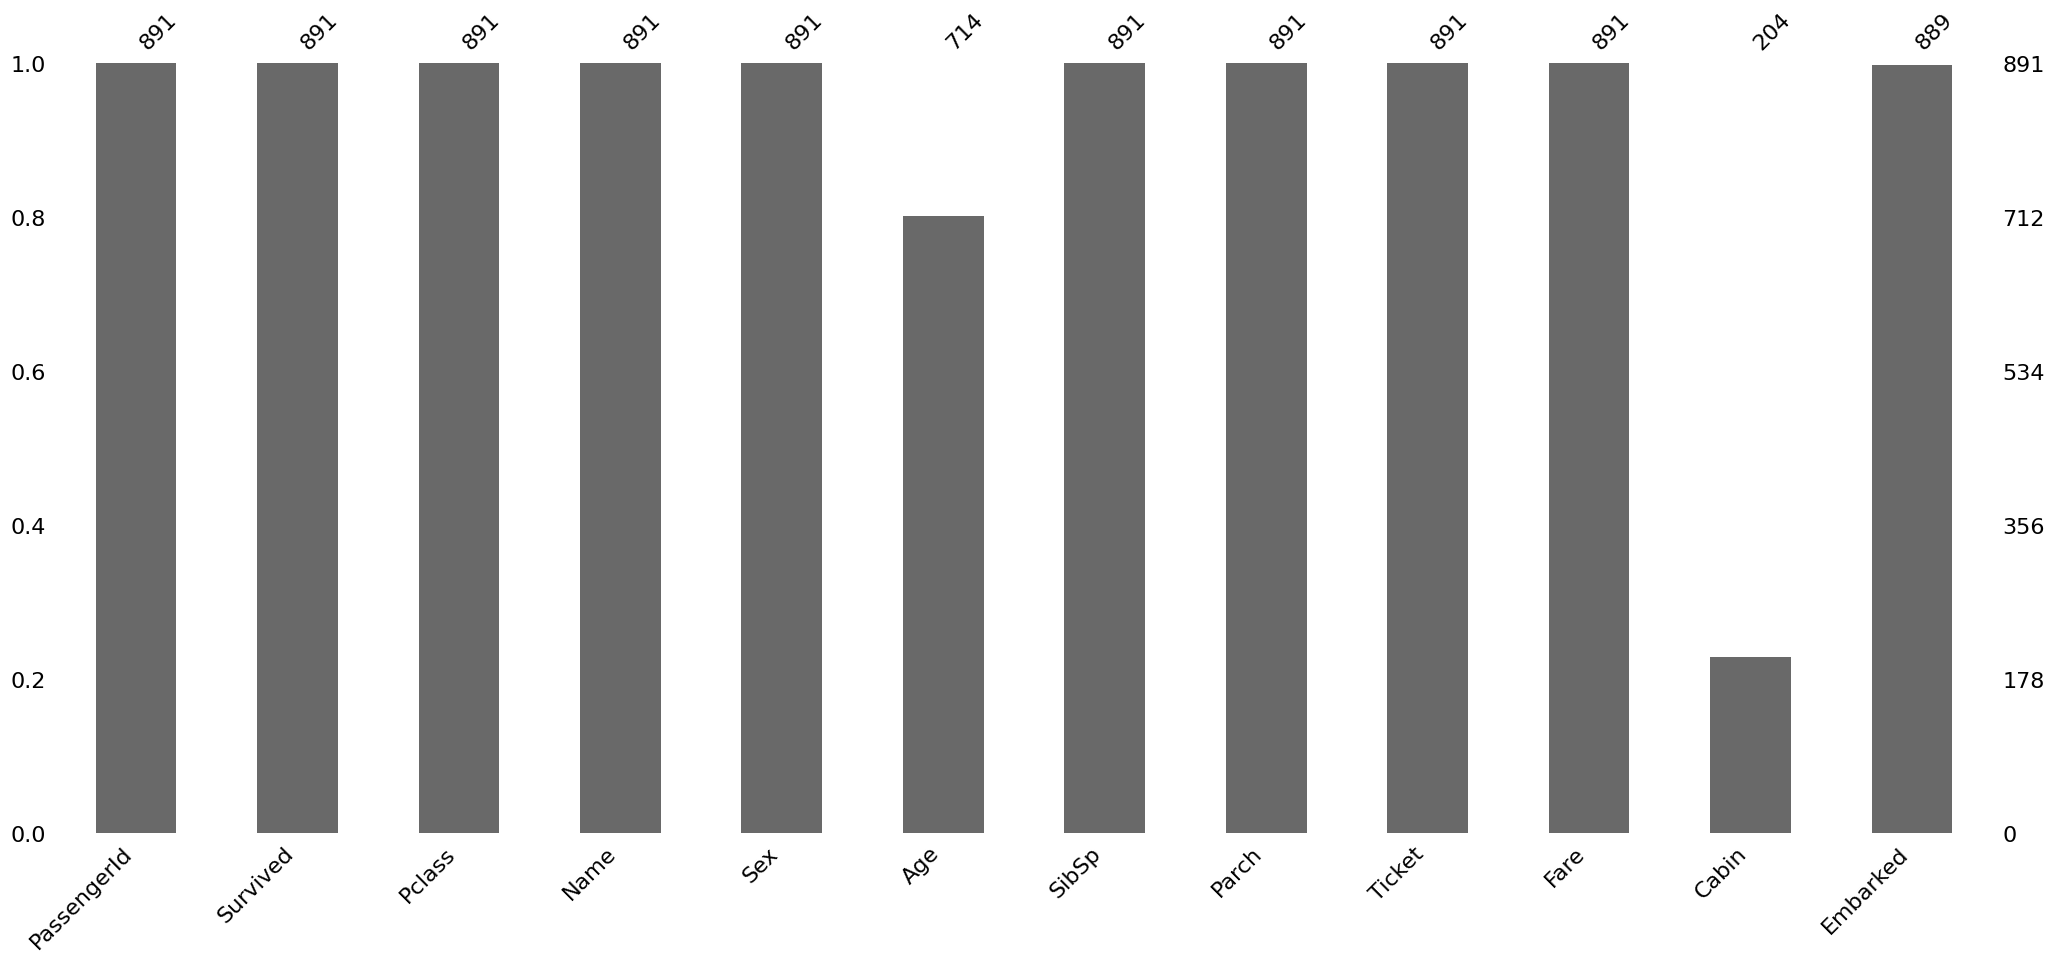

In [22]:
import missingno as msno
msno.bar(titanic_data)

Deleting the Missing values ou Imputing the Missing Values

## 1- Deleting the Missing values

### 1.1- Deleting the entire row (listwise deletion)

In [10]:
df = titanic_data
df.shape

(891, 12)

In [11]:
df = df.dropna(axis=0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df.shape

(183, 12)

Delete a specific line

In [13]:
df = titanic_data
print(df.shape)
df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df = df.dropna(subset='Embarked',axis=0)
print(df.shape)
df.isnull().sum()

(889, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 1.2 Deleting the entire column

In [15]:
df = titanic_data
df.shape

(891, 12)

In [16]:
df = df.drop(['Cabin'],axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
df.shape

(891, 11)

## 2- Imputing the Missing Value

### 2.1- Simple imputation
L'imputation simple consiste à remplacer les valeurs manquantes pour chaque valeur individuelle par un attribut quantitatif ou qualitatif de toutes les valeurs non manquantes. 
Avec l'imputation simple, les données manquantes sont traitées par différentes méthodes telles que le mode, la moyenne ou la médiane des valeurs disponibles. 
+ Les méthodes d'imputation simples peuvent être utilisées comme des techniques de référence faciles à mettre en œuvre. 
- Les méthodes d'imputation simples peuvent produire des résultats biaisés ou irréalistes sur des ensembles de données à haute dimension. 

#### 2.1.1- Replacing with the mean
L'imputation par la moyenne est largement utilisée lorsque les données sont normalement distribuées.

S’il y a des valeurs aberrantes, la moyenne ne sera pas appropriée.

In [17]:
df = titanic_data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\21266\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

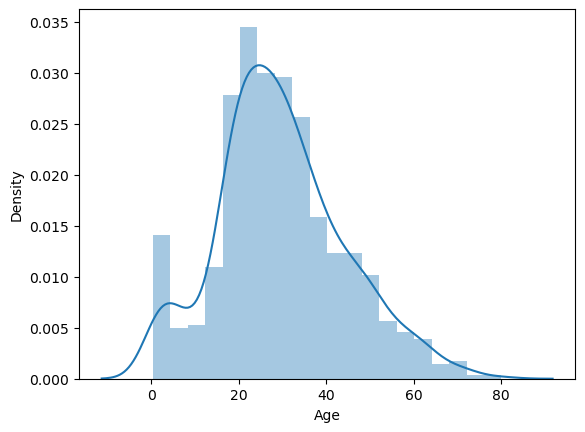

In [19]:
import seaborn as sns
sns.distplot(df['Age'])

In [19]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df['Age_mean_imputed'] = mean_imputer.fit_transform(df[['Age']])
#df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

In [20]:
df['Age_mean_imputed']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_mean_imputed, Length: 891, dtype: float64

In [21]:
df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Age_mean_imputed      0
dtype: int64

C:\Users\Soukaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_mean_imputed', ylabel='Density'>

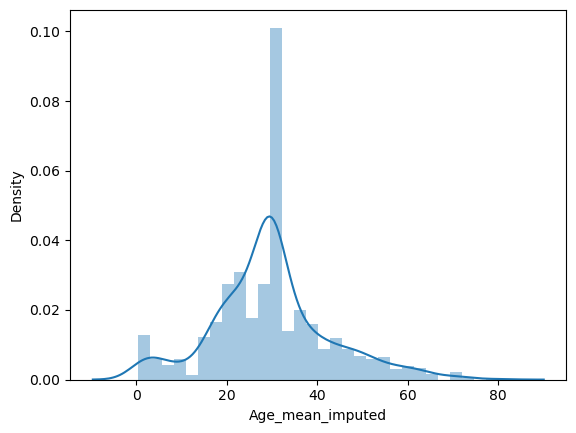

In [22]:
sns.distplot(df['Age_mean_imputed'])

#### 2.1.2- Replacing with the median
L'imputation par la médiane est préférée lorsque les données présentent des valeurs aberrantes.

In [23]:
df = titanic_data
median_imputer = SimpleImputer(strategy='median')
df['Age_median_imputed'] = median_imputer.fit_transform(df[['Age']])
#df['Age_median'] = df['Age'].fillna(df['Age'].median())

In [24]:
df['Age_median_imputed']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median_imputed, Length: 891, dtype: float64

#### 2.1.3- Replacing with the mode
L'imputation par mode est utilisée pour les données catégorielles.

In [25]:
df['Embarked'].isnull().sum ()

2

In [26]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df['Embarked_mode'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
df['Embarked_mode'].value_counts()

S    646
C    168
Q     77
Name: Embarked_mode, dtype: int64

### 2.2- Replacing With Arbitrary Value
Remplissage avant ou arrière : cette méthode est couramment utilisée dans les données de séries temporelles ou les données ordonnées où les valeurs manquantes sont remplies avec la dernière valeur connue (remplissage avant) ou la prochaine valeur connue (remplissage arrière). Elle suppose une relation linéaire entre les points de données et est utile lorsqu'il s'agit de données temporelles.

#### 2.2.1- Replacing with the previous value – forward fill

In [30]:
df['Age_forward']=df['Age'].fillna(method='ffill')

In [31]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [32]:
df['Age_forward']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age_forward, Length: 891, dtype: float64

#### 2.2.2- Replacing with next value – Backward fill

In [33]:
df['Age_backward']=df['Age'].fillna(method='bfill')

In [34]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
df['Age_backward']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age_backward, Length: 891, dtype: float64

## 3- Outlier detection
La détection des valeurs aberrantes est une étape essentielle du prétraitement des données pour garantir la qualité des données et la robustesse du modèle.

In [25]:
import pandas as pd
data = pd.read_csv('titanic_dataset.csv')

In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
d = data[['Age', 'Fare']].dropna()

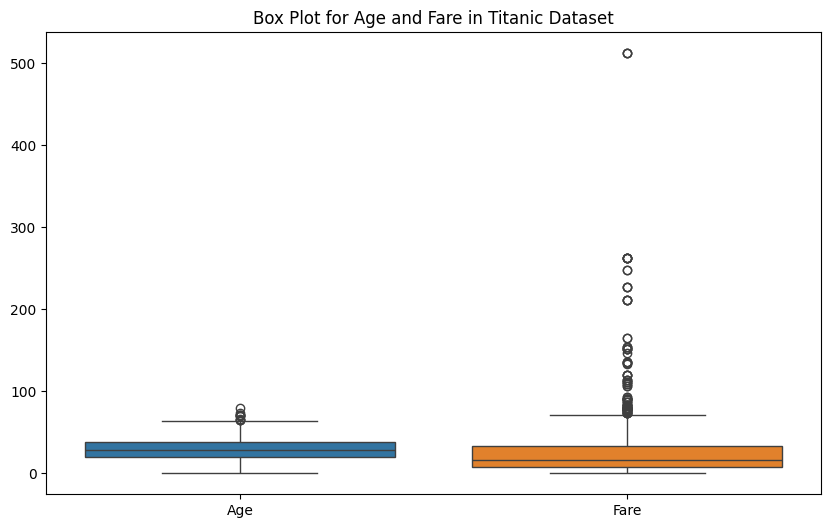

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize outliers using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=d[['Age', 'Fare']])
plt.title('Box Plot for Age and Fare in Titanic Dataset')
plt.show()

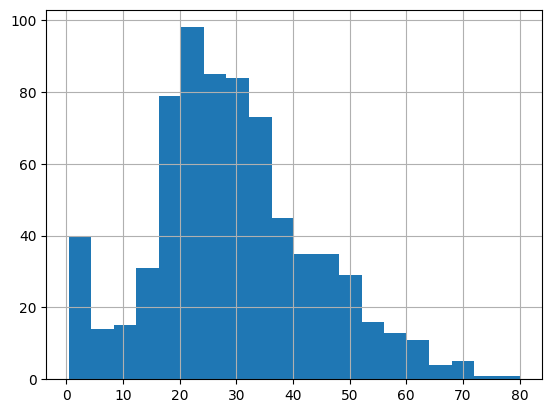

In [29]:
import matplotlib.pyplot as plt
plt.figure()
d['Age'].hist(bins='auto', alpha=1)
plt.show()

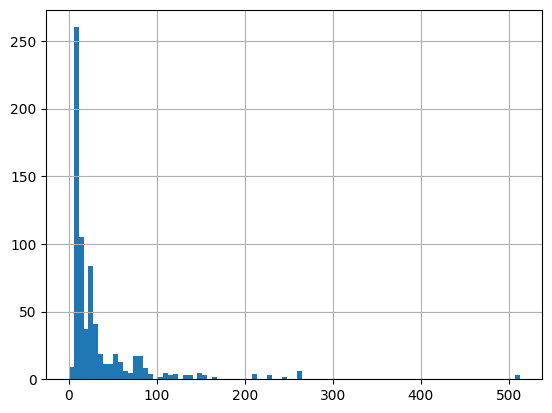

In [30]:
plt.figure()
d['Fare'].hist(bins='auto', alpha=1)
plt.show()

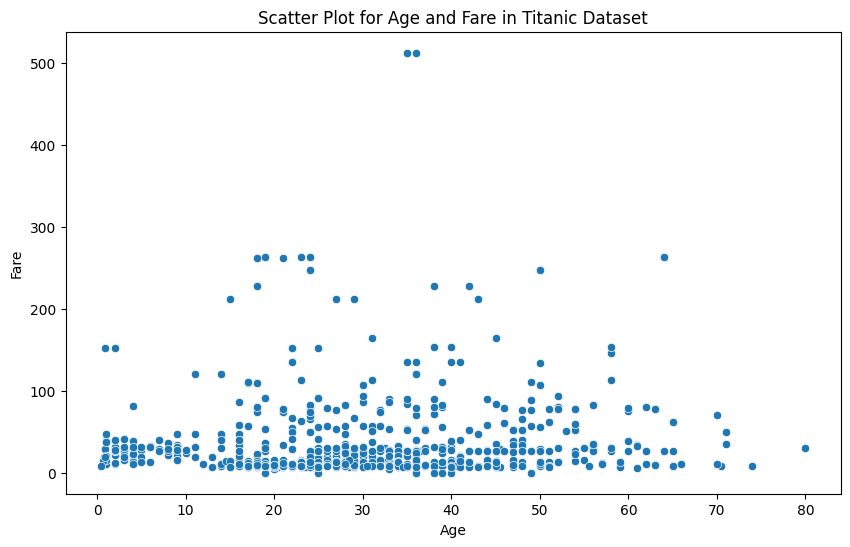

In [31]:
# Visualize outliers using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=d, x='Age', y='Fare')
plt.title('Scatter Plot for Age and Fare in Titanic Dataset')
plt.show()

## 4-Manipulation des données avec Pandas

In [74]:
import pandas as pd
df = pd.read_csv('titanic_dataset.csv')

In [75]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
# Remplacer les valeurs manquantes dans la colonne 'Age' par la médiane
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [77]:

# Remplacer les valeurs manquantes dans la colonne 'Embarked' par la valeur la plus fréquente
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [78]:
df.drop('Cabin', axis=1, inplace=True)

In [79]:
print("\nValeurs manquantes après traitement :")
print(df.isnull().sum())
df_saved=df


Valeurs manquantes après traitement :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [56]:
# Conversion de la colonne 'Sex' en valeurs numériques (0 pour female, 1 pour male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [57]:
# Création d'une nouvelle colonne 'Title' à partir de 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Affichage des titres uniques
print("Titres extraits des noms :")
print(df['Title'].unique())

Titres extraits des noms :
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_12656\324814663.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [58]:
# Regroupement des titres rares dans une catégorie 'Other'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Other')

# Remplacement de 'Mlle' et 'Ms' par 'Miss', et 'Mme' par 'Mrs'
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Affichage de la répartition des titres
print("\nRépartition des titres après regroupement :")
print(df['Title'].value_counts())


Répartition des titres après regroupement :
Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64


In [59]:
# Sélection des passagers de première classe
first_class = df[df['Pclass'] == 1]
print("Nombre de passagers en première classe :", len(first_class))

Nombre de passagers en première classe : 216


In [60]:
# Sélection des passagers de première classe
first_class = df[df['Pclass'] == 1]
print("Nombre de passagers en première classe :", len(first_class))

Nombre de passagers en première classe : 216


In [61]:
# Sélection des colonnes spécifiques
subset = df[['Name', 'Age', 'Sex', 'Survived']]
print("\nAperçu des colonnes sélectionnées :")
print(subset.head())


Aperçu des colonnes sélectionnées :
                                                Name   Age  Sex  Survived
0                            Braund, Mr. Owen Harris  22.0    1         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0    0         1
2                             Heikkinen, Miss. Laina  26.0    0         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0    0         1
4                           Allen, Mr. William Henry  35.0    1         0


In [62]:
# Taux de survie par classe
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Taux de survie par classe :")
print(survival_by_class)

Taux de survie par classe :
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [63]:
# Taux de survie par sexe et classe
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print("\nTaux de survie par sexe et classe :")
print(survival_by_sex_class)


Taux de survie par sexe et classe :
Sex  Pclass
0    1         0.968085
     2         0.921053
     3         0.500000
1    1         0.368852
     2         0.157407
     3         0.135447
Name: Survived, dtype: float64


In [65]:
# Création d'une colonne 'AgeGroup' pour catégoriser les passagers par âge
bins = [0, 18, 35, 50, 100]
labels = ['Enfant', 'Jeune adulte', 'Adulte', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Affichage de la répartition des groupes d'âge
print("Répartition des groupes d'âge :")
print(df['AgeGroup'].value_counts())

Répartition des groupes d'âge :
AgeGroup
Jeune adulte    535
Adulte          153
Enfant          139
Senior           64
Name: count, dtype: int64


bins : Définit les bornes d'âge pour classer les passagers en catégories :
- 0 - 18 ans → Enfant
- 18 - 35 ans → Jeune adulte
- 35 - 50 ans → Adulte
- 50 - 100 ans → Senior

In [66]:
# Création d'une colonne 'IsAlone' pour indiquer si le passager voyage seul
df['IsAlone'] = (df['SibSp'] + df['Parch']) == 0
df['IsAlone'] = df['IsAlone'].map({True: 'Seul', False: 'En famille'})

# Affichage de la répartition
print("\nRépartition des passagers voyageant seuls ou en famille :")
print(df['IsAlone'].value_counts())


Répartition des passagers voyageant seuls ou en famille :
IsAlone
Seul          537
En famille    354
Name: count, dtype: int64


In [67]:
# Création d'un DataFrame pour les statistiques de survie
survival_stats = df.groupby(['Pclass', 'Sex'])['Survived'].agg(['mean', 'count'])
survival_stats.rename(columns={'mean': 'SurvivalRate', 'count': 'PassengerCount'}, inplace=True)
print("Statistiques de survie par classe et sexe :")
print(survival_stats)

Statistiques de survie par classe et sexe :
            SurvivalRate  PassengerCount
Pclass Sex                              
1      0        0.968085              94
       1        0.368852             122
2      0        0.921053              76
       1        0.157407             108
3      0        0.500000             144
       1        0.135447             347


In [68]:
# Création d'une table pivot pour le taux de survie par classe et sexe
pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Table pivot : Taux de survie par classe et sexe :")
print(pivot_table)

Table pivot : Taux de survie par classe et sexe :
Sex            0         1
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [ ]:
# Exportation du DataFrame nettoyé et transformé vers un fichier CSV
df.to_csv('titanic_cleaned.csv', index=False)
print("Le dataset transformé a été exporté vers 'titanic_cleaned.csv'.")

## 5- Visualisation des données

In [69]:
# Importation des bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Taille par défaut des graphiques

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

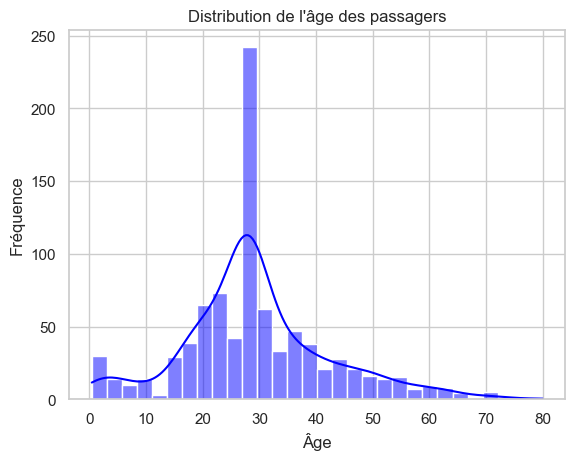

In [84]:
# Histogramme de la distribution des âges
sns.histplot(df_saved['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution de l\'âge des passagers')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

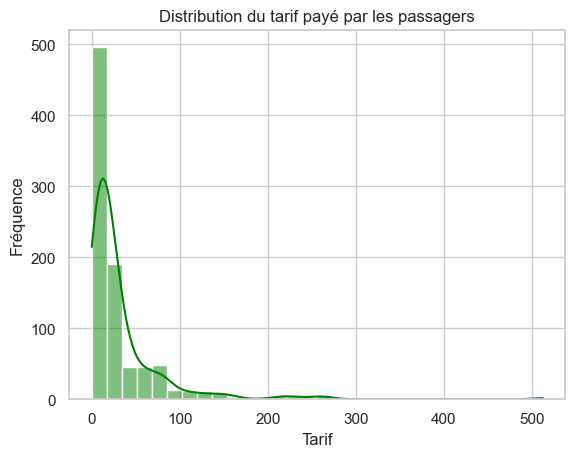

In [85]:
# Histogramme de la distribution du tarif
sns.histplot(df_saved['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution du tarif payé par les passagers')
plt.xlabel('Tarif')
plt.ylabel('Fréquence')
plt.show()

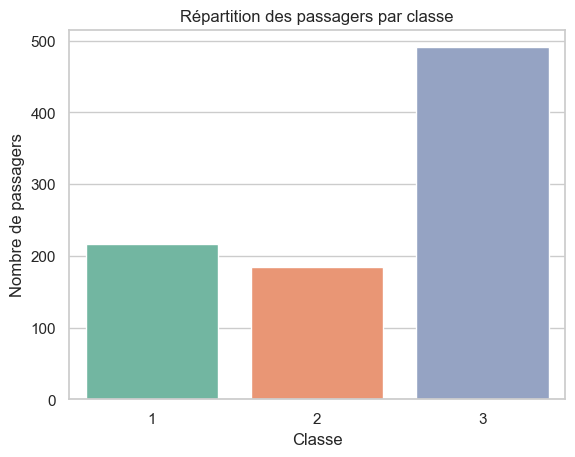

In [86]:
# Diagramme en barres pour la répartition des passagers par classe
sns.countplot(x='Pclass', data=df_saved, hue='Pclass', palette='Set2', legend=False)
plt.title('Répartition des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

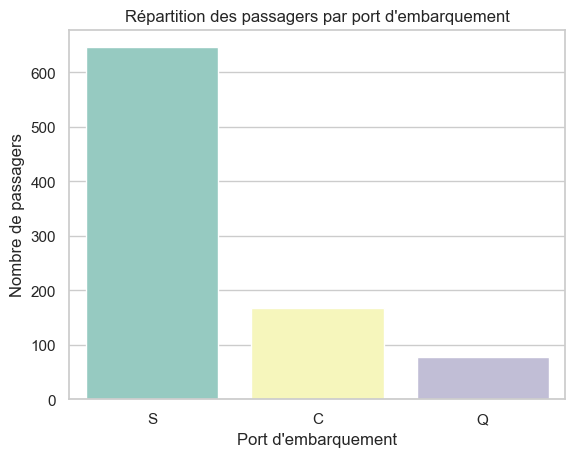

In [87]:
# Diagramme en barres pour la répartition des passagers par port d'embarquement
sns.countplot(x='Embarked', data=df_saved, hue='Embarked', palette='Set3', legend=False)
plt.title('Répartition des passagers par port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.show()

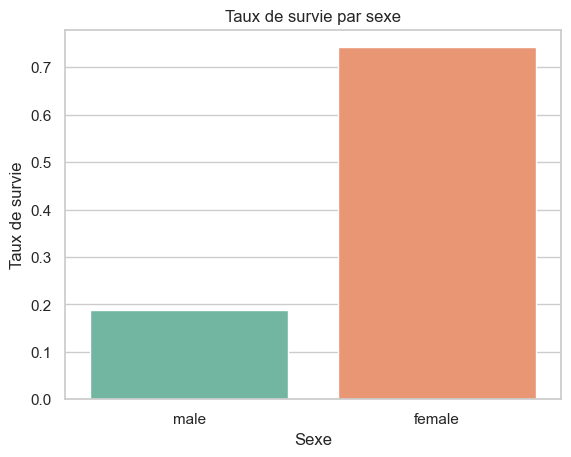

In [88]:
# Diagramme en barres pour le taux de survie par sexe
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df_saved, palette='Set2', errorbar=None, legend=False)
plt.title('Taux de survie par sexe')
plt.xlabel('Sexe')
plt.ylabel('Taux de survie')
plt.show()

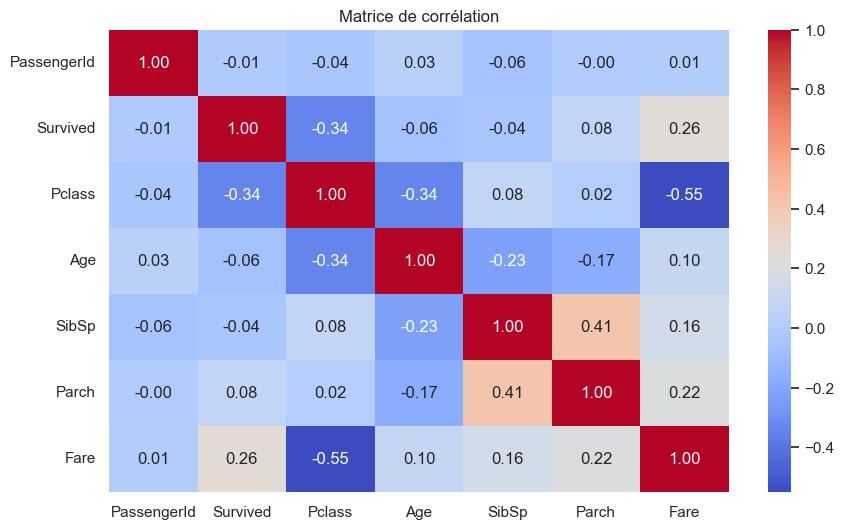

In [94]:
# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 6))
corr_matrix = df_saved.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()